# Tópicos de Minería de Datos (TMD) - λc.c

Autores: Pablo Granitto, Nicolás Soncini

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

!pip install kmedoids
from kmedoids import KMedoids
from sklearn.metrics.pairwise import euclidean_distances

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 6.6 MB/s eta 0:00:00


In [2]:
def plot_data(X, y_true, y_predict):
    markers = ['o', '^', 's']  # Circle, Triangle up, Square
    # colors = ['red', 'blue', 'green']

    plt.figure(figsize=(8, 6))

    # Plot each class with its specific marker and color
    for i, class_label in enumerate(np.unique(y_true)):
        class_data = X[y_true == class_label]
        plt.scatter(class_data[:, 0], class_data[:, 1],
                    marker=markers[i],
                    c=y_predict[y_true == class_label],
                    label=f'Class {class_label}',
                    s=100,  # Marker size
                    alpha=0.7) # Transparency

Dos Gausianas Dataset

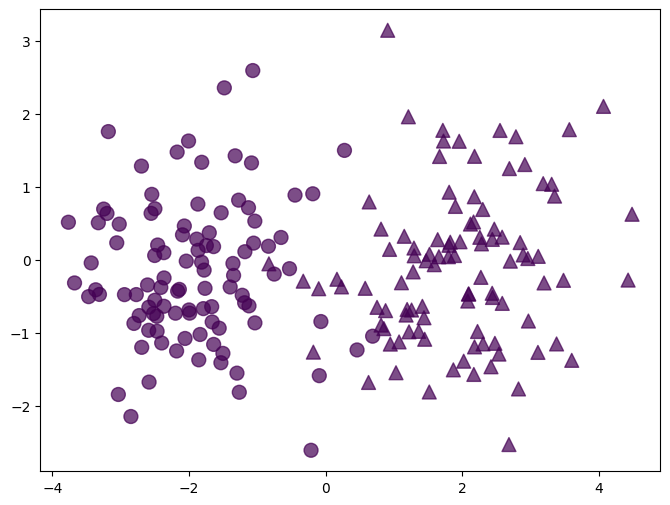

In [3]:
# Creo Gausianas, dos clusters

def genera_dos_gausianas(n = 100, gap = 2):
    gausianas = np.zeros((2*n, 3))

    x = np.random.normal(-gap, size=n)
    y = np.random.normal(0, size=n)
    c = np.repeat(0, n)
    gausianas[0:n, :] = np.vstack((x, y, c)).T

    x = np.random.normal(gap, size=n)
    y = np.random.normal(0, size=n)
    c = np.repeat(1, n)
    gausianas[n:(2*n), :] = np.vstack((x, y, c)).T

    return gausianas

gausianas = genera_dos_gausianas()

plot_data(gausianas[:, :2], gausianas[:, 2], gausianas[:, 2])

Aplicamos K-Means

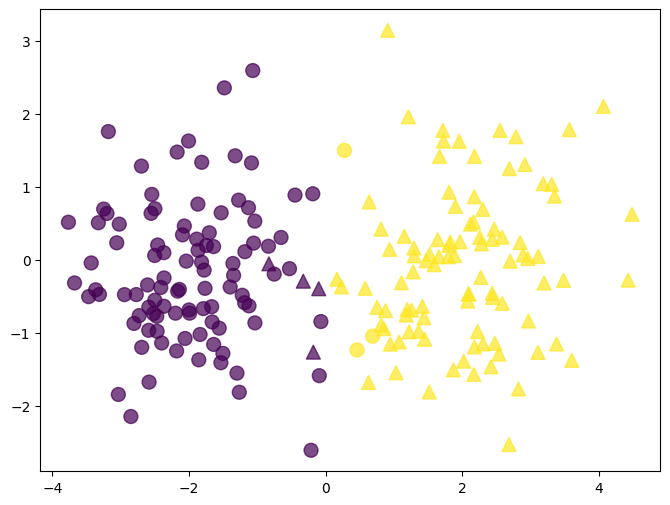

In [4]:
kmeans = KMeans(2).fit(gausianas[:, :2])

plot_data(gausianas[:, :2], gausianas[:, 2], kmeans.labels_)

Moons Dataset

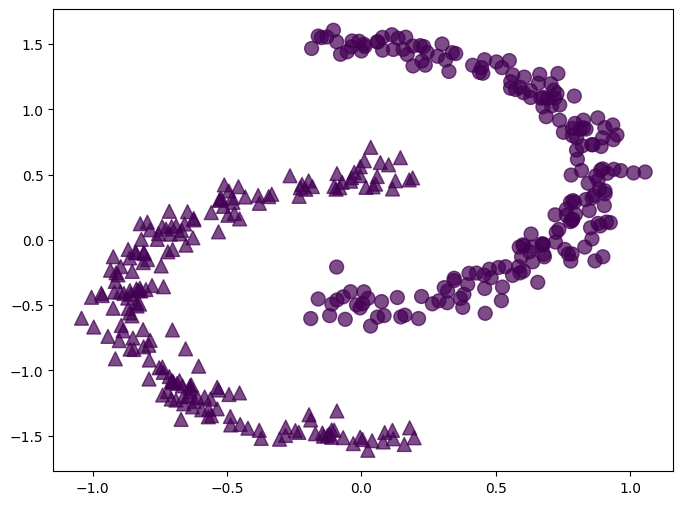

In [5]:
def genera_moons(n = 200, gap = -0.1, noise = 0.07):
    moons = np.zeros((n*2, 3))

    theta = np.random.uniform(-np.pi/2+gap, np.pi/2-gap, size=n)
    rho = np.random.normal(1, noise, size=n)
    x = rho * np.cos(theta) - 0.1
    y = rho * np.sin(theta) + 0.5
    c = np.repeat(0, n)
    moons[0:n, :] = np.vstack((x,y,c)).T

    theta = np.random.uniform(np.pi/2+gap, 3/2*np.pi-gap, size=n)
    rho = np.random.normal(1, noise, size=n)
    x = rho * np.cos(theta) + 0.1
    y = rho * np.sin(theta) - 0.5
    c = np.repeat(1, n)
    moons[n:(2*n), :] = np.vstack((x,y,c)).T

    return moons

moons = genera_moons()
plot_data(moons[:, :2], moons[:, 2], moons[:, 2])

KMeans en Moons. ¿QUE DEBERÍA DAR?

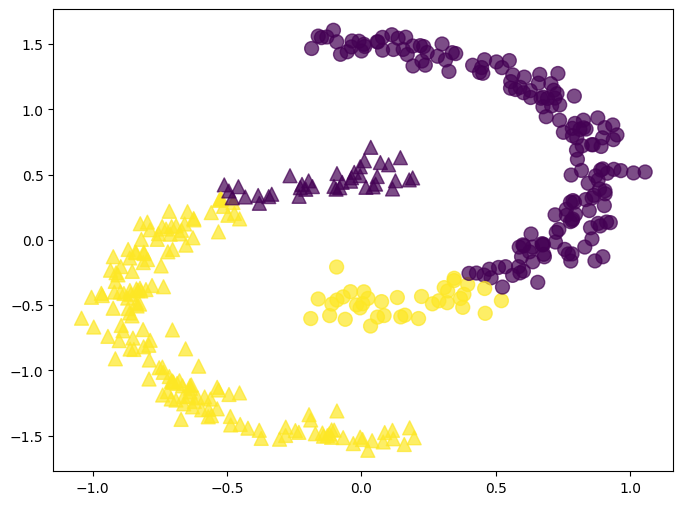

In [6]:
kmeans = KMeans(2).fit(moons[:, :2])
plot_data(moons[:, :2], moons[:, 2], kmeans.labels_)

# Outliers

Genero un Outlier en gausianas

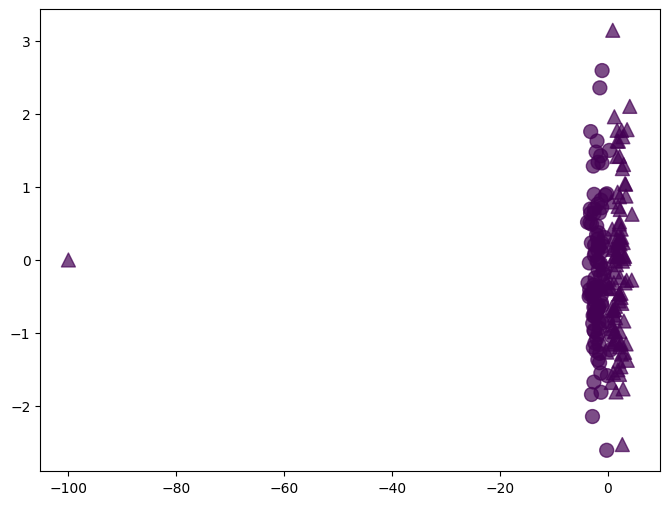

In [7]:
gausianas_anterior = gausianas.copy()
gausianas[0, :] = [-100, 0, 1]

plot_data(gausianas[:, :2], gausianas[:, 2], gausianas[:, 2])

Aplico KMeans

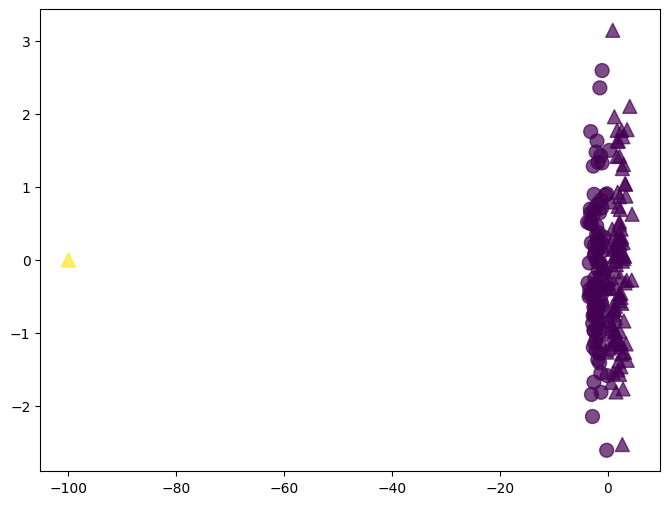

In [8]:
kmeans = KMeans(2).fit(gausianas[:, :2])

plot_data(gausianas[:, :2], gausianas[:, 2], kmeans.labels_)

Aplico PAM ("Partitioning Around Medoids")

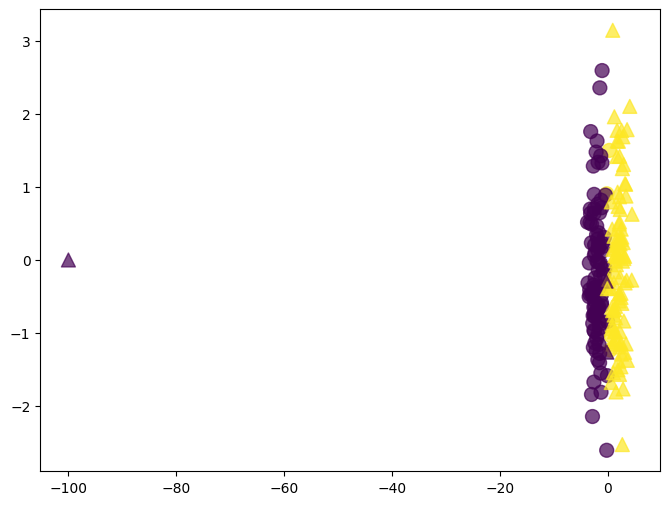

In [9]:
gausianas_diss = euclidean_distances(gausianas[:, :2])
kmed = KMedoids(2, method='fasterpam').fit(gausianas_diss)

plot_data(gausianas[:, :2], gausianas[:, 2], kmed.labels_)

# Iris (COMPLETAR)

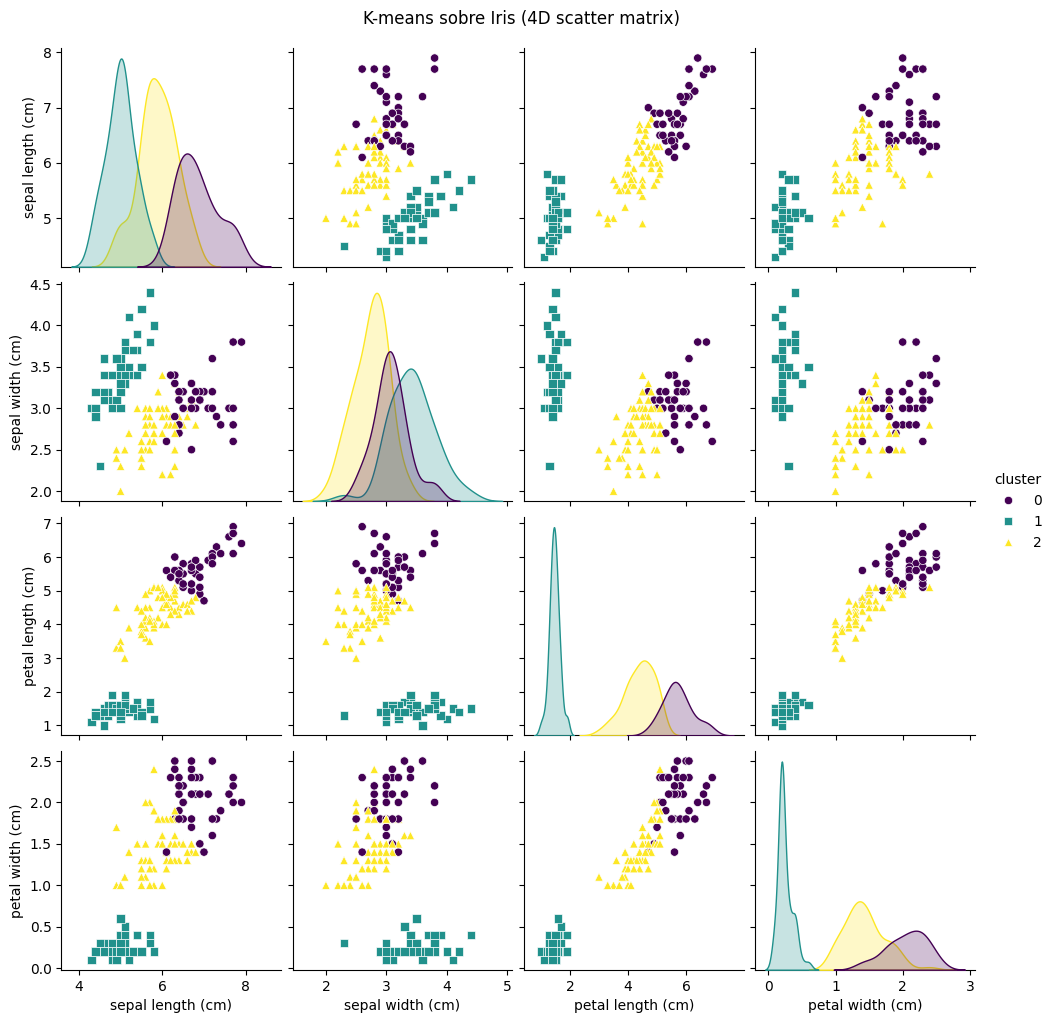

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Cargo dataset iris
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# k-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# DataFrame con clusters y especie real
df = X.copy()
df['cluster'] = clusters
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Pairplot (scatter matrix)
sns.pairplot(
    df,
    vars=iris.feature_names,
    hue="cluster",          # color según cluster
    markers=["o", "s", "^"], # distinta forma según especie (manual abajo)
    diag_kind="kde",
    palette="viridis"
)

plt.suptitle("K-means sobre Iris (4D scatter matrix)", y=1.02)
plt.show()